<div style="padding:20px;color:#DEB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#800000;overflow:hidden;font-weight:800">🚀 Spaceship Titanic 🚀</div>



* Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. 
* We've received a transmission from four lightyears away and things aren't looking good.
* The Spaceship Titanic was an interstellar passenger liner launched a month ago. 
* With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

* While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. 
* Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>Introduction & Content Overview</div></b>

* This notebook Covers Eda , Feature Engineering , Automated Models using Lazypredict and Manual Models (Inprogress)

* Content 
    * Environment & Dataset Setup
    * Inspecting Dataframe
    * Univariate Analysis
    * Multivariate Analysis
    * Feature Engineering
    * Automated Model Using Lazypredict
    * Manual Tree Models
    


## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>1 | Environment & Dataset Setup</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#660000'> Install Lazypredict</span></b>  

In [1]:
from IPython.display import clear_output
#!pip3 install -U lazypredict
clear_output()

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#660000'> Import Libraries</span></b>  

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
#from lazypredict.Supervised import LazyClassifier

### <b><span style='color:#DEB078'>1.3 |</span><span style='color:#660000'> Configure Properties</span></b>  

In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100
plotly.offline.init_notebook_mode(connected=True)
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))

### <b><span style='color:#DEB078'>1.4 |</span><span style='color:#660000'> Import Data</span></b>  

df_raw=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train=df_raw.copy()
submission=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")


In [4]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/9_spaceship_titanic/Dataset/train.csv")
train=df_raw.copy()
submission=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/9_spaceship_titanic/Dataset/sample_submission.csv")
test=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/9_spaceship_titanic/Dataset/test.csv")

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>2 | Inspecting Dataframe</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#660000'> Features Descriptions</span></b>  

* <b>PassengerId</b> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* <b>HomePlanet</b> - The planet the passenger departed from, typically their planet of permanent residence.
* <b>CryoSleep</b> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* <b>Cabin</b> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* <b>Destination</b> - The planet the passenger will be debarking to.
* <b>Age</b> - The age of the passenger.
* <b>VIP</b> - Whether the passenger has paid for special VIP service during the voyage.
* <b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* <b>Name</b> - The first and last names of the passenger.
* <b>Transported</b> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#660000'> Shape and Column Dtype</span></b>  

In [5]:
train.shape

(8693, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#660000'> Data Changes based on column description</span></b>  

In [7]:
# Splitting Passenger id and Cabin  to better understand relation of individual values present in them

train=train.assign(
          PassengerId_GroupId=train['PassengerId'].str[:4].astype(np.int16)
         ,PassengerId_PassengerNumber=train['PassengerId'].str[5:].astype(np.int16)
         )

train.drop(columns='PassengerId',inplace=True)

train=train.assign( 
           Cabin_Deck=train["Cabin"].str.split("/").str[0],
          Cabin_Num=train["Cabin"].str.split("/").str[1],
           Cabin_Side=train["Cabin"].str.split("/").str[2]
         )

train.drop(columns='Cabin',inplace=True)

### <b><span style='color:#DEB078'>2.4 |</span><span style='color:#660000'> Null Check</span></b>  

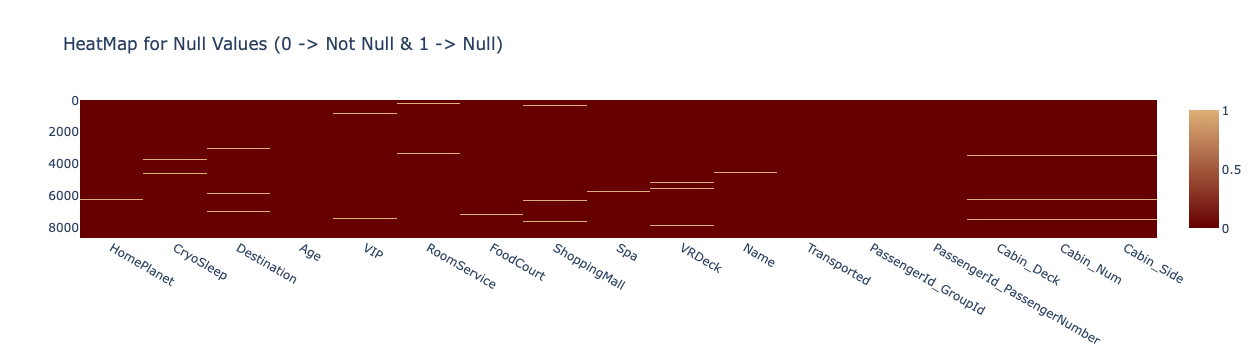

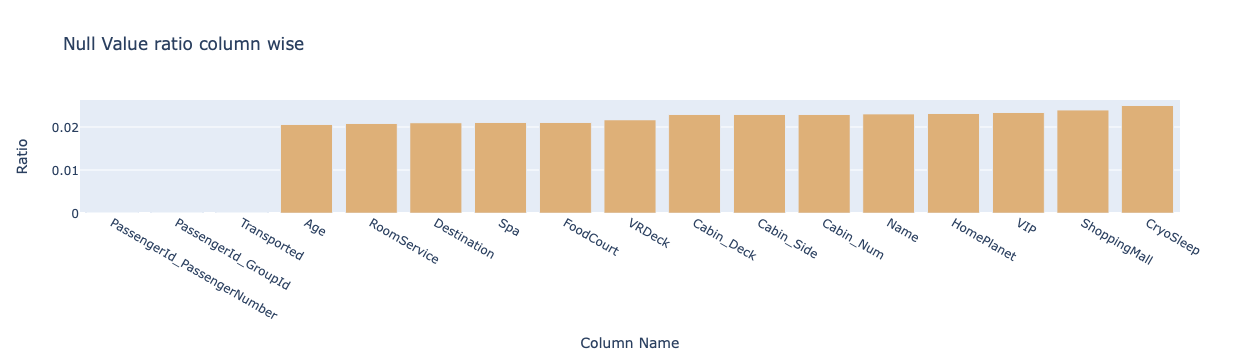

In [8]:
temp_data= train.isna().mean().sort_values()
fig=px.imshow(train.isna().astype(np.int8),color_continuous_scale=['#660000','#DEB078'],title='HeatMap for Null Values (0 -> Not Null & 1 -> Null)')
fig.show()
fig=px.bar(x=temp_data.index, y=temp_data.values ,color_discrete_sequence=['#DEB078'],title='Null Value ratio column wise',labels={'x':'Column Name','y':'Ratio'})
fig.show()

### <b><span style='color:#DEB078'>2.5 |</span><span style='color:#660000'> Unique Vallue Check</span></b>  

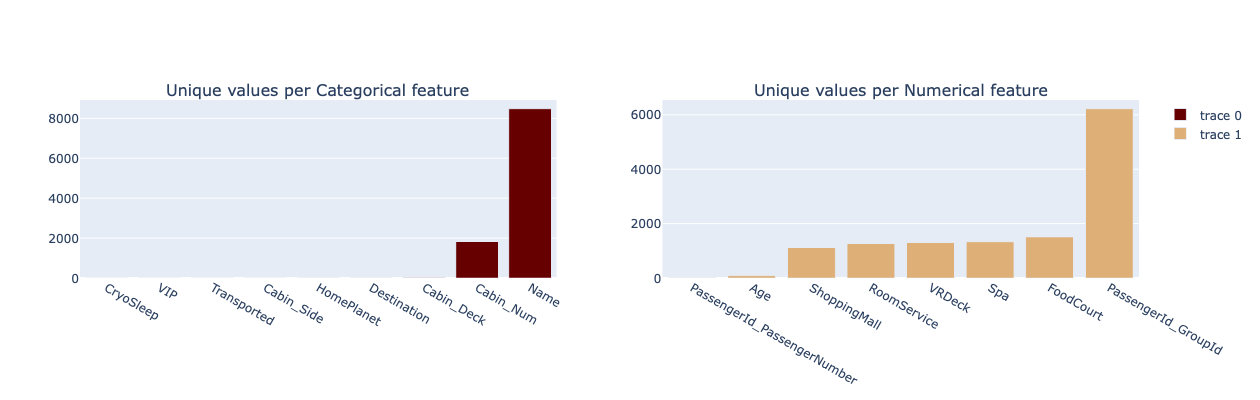

In [9]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=train.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#660000')),
    row=1, col=1
)



temp_data=train.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

fig.update_layout(height=400)
fig.show()

### <b><span style='color:#DEB078'>2.6 |</span><span style='color:#660000'> Value Behaviour Across Rows</span></b>  

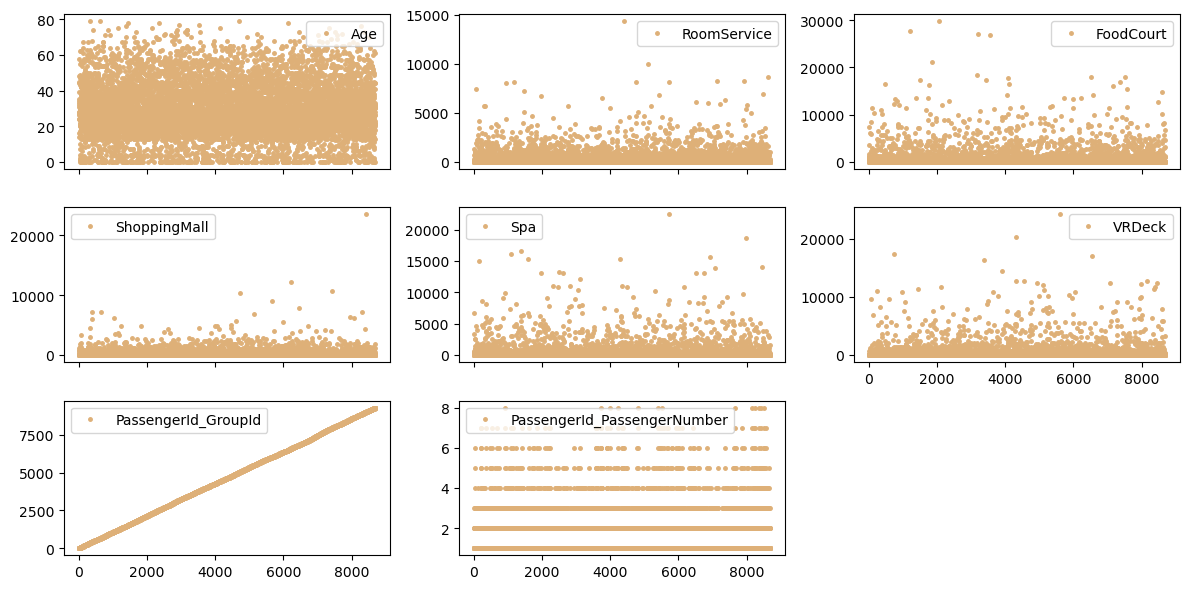

In [10]:
# For all Numerical columnn for all rows 
train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,6), markersize=5,color='#DEB078')
plt.tight_layout()

### <b><span style='color:#DEB078'>2.7 |</span><span style='color:#660000'> Data Changes based on unique value</span></b>  

In [11]:
train.drop(columns='Name',inplace=True)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>3 | Univariate Analysis</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#660000'> Target Variable</span></b>  

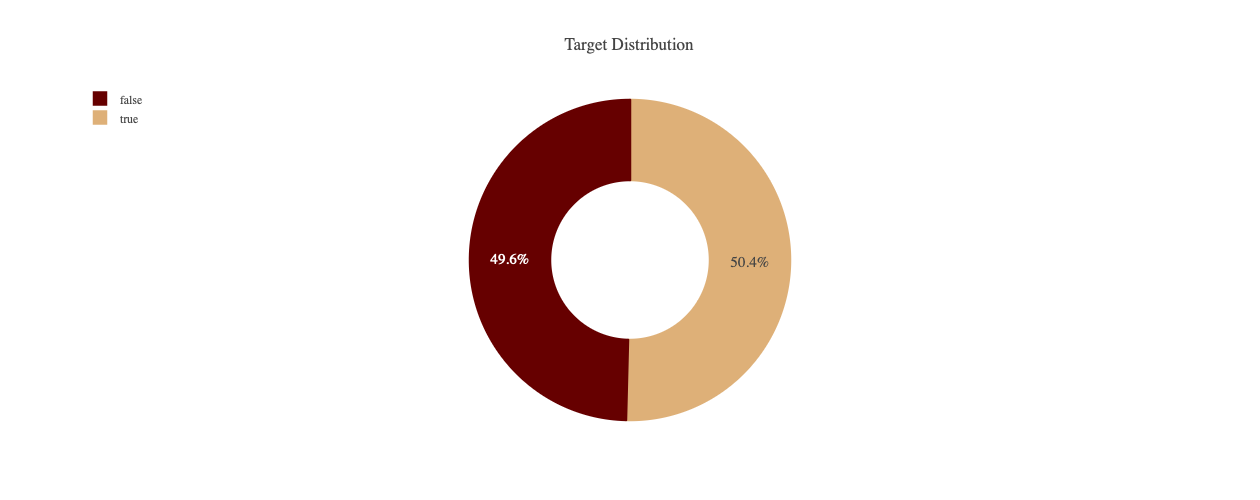

In [12]:

target=train[['Transported']].value_counts(normalize=True).round(decimals=3)*100

pal, color=['#DEB078','#660000'], ['#DEB078','#660000']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()

***
*  50.4 % of training set got transported
*  49.6 % of training set did not got transported
***

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#660000'> Categorical Columns</span></b>  

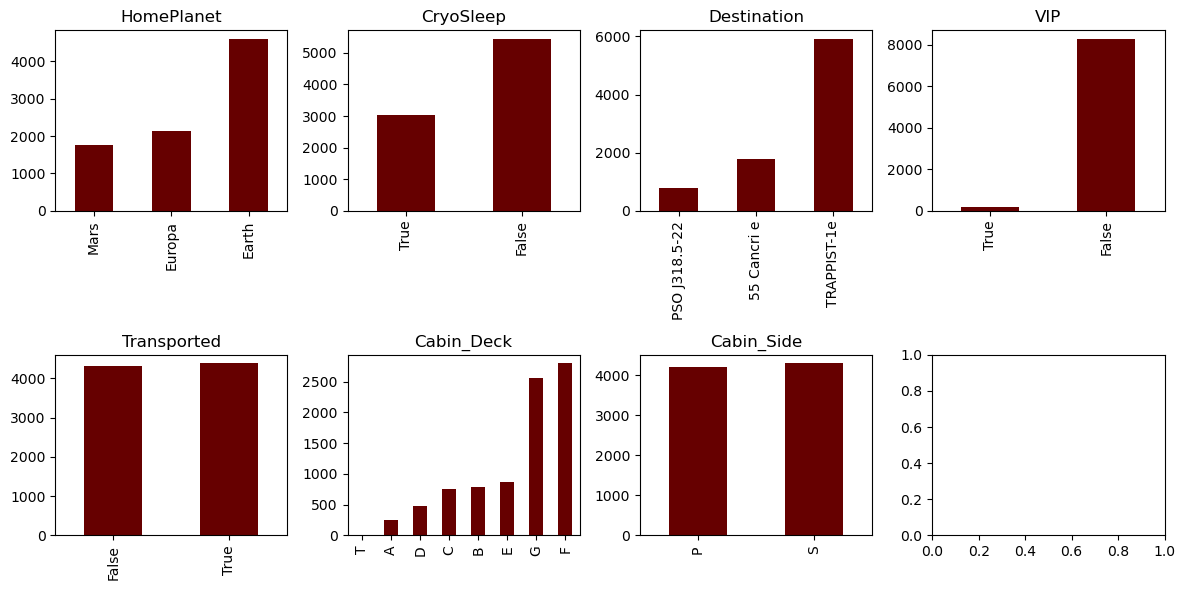

In [13]:
cat_threshold=10
fields=train.select_dtypes(exclude="number").nunique()[train.select_dtypes(exclude="number").nunique() <=cat_threshold].index.tolist()

figuresize=(12,6)
cols=4
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    train[fields[i-1]].value_counts().sort_values().plot.bar(color='#660000')  
    plt.xticks(rotation=90)
    plt.title(fields[i-1])
    
plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#660000'> Numerical Columns</span></b>  

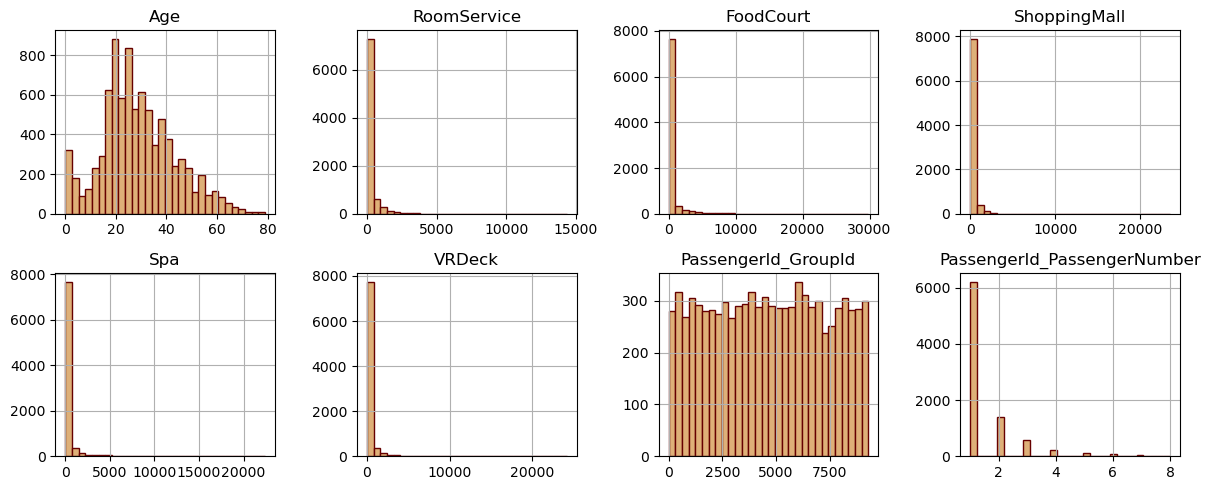

In [14]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,5)
layout_val=(-1, 4)
train.hist(bins=30, figsize=figsize_val, layout=layout_val,color='#DEB078', edgecolor="#660000")
plt.tight_layout();

### <b><span style='color:#DEB078'>3.4 |</span><span style='color:#660000'> Outlier Check for Numerical Columns using IQR</span></b>  

In [15]:
kk=(train.select_dtypes(include='number').columns).to_list()

df=train[kk]


upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

for i in train.select_dtypes(include='number'):
    print('\nColumn -> ',i,'')   
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)


Column ->  Age 
No of Outliers presesnt ->  77

 **********

Column ->  RoomService 
No of Outliers presesnt ->  1861

 **********

Column ->  FoodCourt 
No of Outliers presesnt ->  1823

 **********

Column ->  ShoppingMall 
No of Outliers presesnt ->  1829

 **********

Column ->  Spa 
No of Outliers presesnt ->  1788

 **********

Column ->  VRDeck 
No of Outliers presesnt ->  1809

 **********

Column ->  PassengerId_GroupId 
No of Outliers presesnt ->  0

 **********

Column ->  PassengerId_PassengerNumber 
No of Outliers presesnt ->  493

 **********


## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>4 | Multivariate Analysis</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#660000'> Helping Function</span></b>  

In [16]:
# Helping Function
def stats(x):
    temp1=(train[[x,'Transported']].value_counts(normalize=True).round(decimals=3)*100).reset_index().rename(columns={0:'Overall_Percent'})
    Coloumn_To_Aggregate=[x,'Transported']
    df6=pd.merge(train.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
                 train.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Category_Percent']=round((df6['ind_siz']/df6['Total'])*100 ,2)
    temp2=df6[[x,'Transported','Category_Percent']]
    temp3=temp1.merge(temp2,on=[x,'Transported'])
    return temp3.pivot(columns=x,index='Transported')

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#660000'> Target variable Relation with Categorical variables</span></b>  

In [17]:
train.select_dtypes(exclude='number').columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
       'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'],
      dtype='object')


<b><span style='color:#660000'> HomePlanet</span></b>

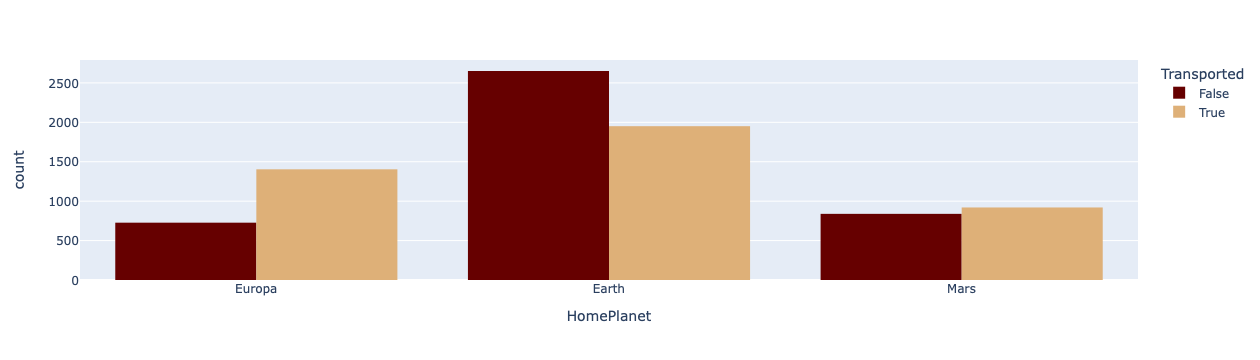

In [18]:
px.histogram(train, x='HomePlanet', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [19]:
stats('HomePlanet')

Overall_Percent              Category_Percent             
HomePlanet            Earth Europa  Mars            Earth Europa  Mars
Transported                                                           
False                  31.2    8.6   9.9            57.61  34.12  47.7
True                   23.0   16.5  10.8            42.39  65.88  52.3

***
* 49.6 % (Not Transported) -> 31.2 %  were from Earth.
* 50.4 % (Transported)     -> 23 % were from Earth.
***
* 42.39 % of people from earth got transported
* 65.88 % of people from Europa got transported
* 52.3 % of people from Mars got transported
***

<b><span style='color:#660000'> CryoSleep</span></b>

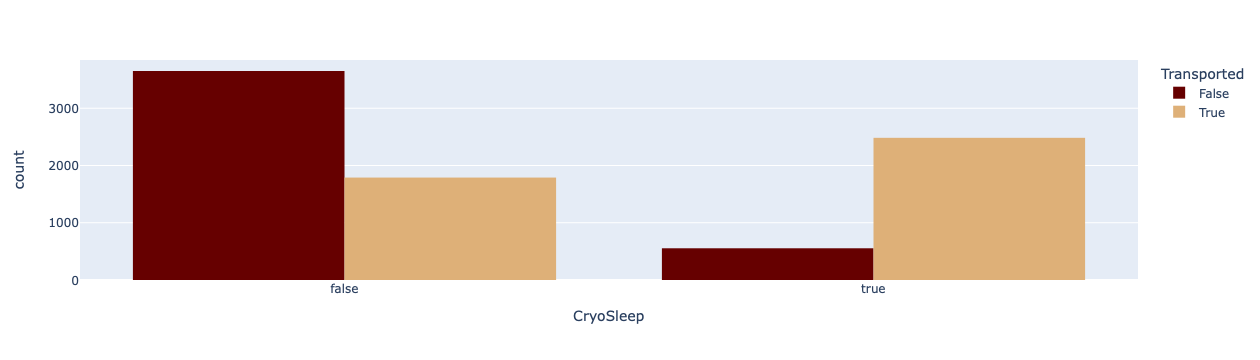

In [20]:
px.histogram(train, x='CryoSleep', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [21]:
stats('CryoSleep')

Overall_Percent       Category_Percent       
CryoSleep             False True             False  True 
Transported                                              
False                  43.1   6.5            67.11  18.24
True                   21.1  29.3            32.89  81.76

***
* 49.6 % (Not Transported) -> 43.1 %  were not in cryosleep and rest 6.1 % were in sleep.
* 50.4 % (Transported)     -> 29.3 % were in sleep and 21.1 % were not in sleep
***
* 81.6  % of people doing cryosleep got transported
* 18.24 % of people not doing cryosleep got transported
***

<b><span style='color:#660000'> Destination</span></b>

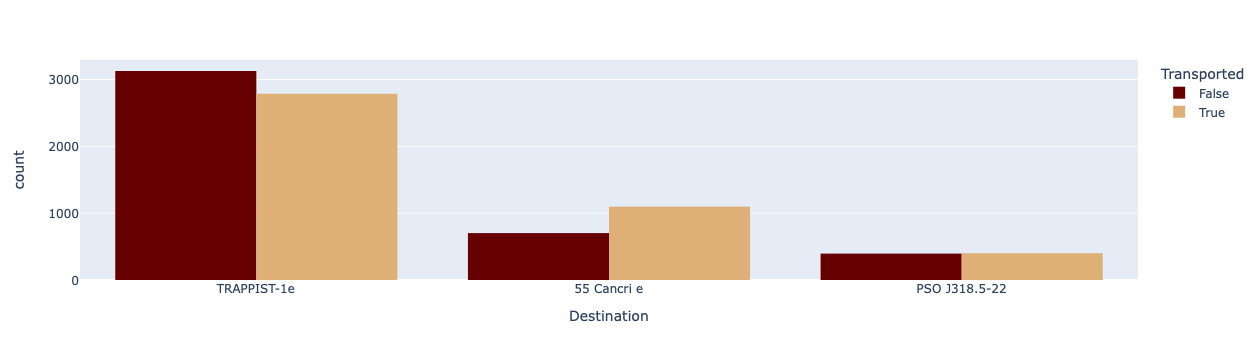

In [22]:
px.histogram(train, x='Destination', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [23]:
stats('Destination')

Overall_Percent                           Category_Percent  \
Destination     55 Cancri e PSO J318.5-22 TRAPPIST-1e      55 Cancri e   
Transported                                                              
False                   8.2           4.6        36.8             39.0   
True                   12.9           4.7        32.7             61.0   

                                       
Destination PSO J318.5-22 TRAPPIST-1e  
Transported                            
False               49.62       52.88  
True                50.38       47.12

***
* 49.6 % (Not Transported) -> 36.8 %  were going to TRAPPIST-1e
* 50.4 % (Transported)     -> 32.7 %  were going to TRAPPIST-1e
***
* 61.0   % of people going to ''55 Cancri e'' got transported
* 50.38 % of people going to ''PSO J318.5-22'' got transported
* 47.12 % of people going to ''TRAPPIST-1e'' got transported
***

<b><span style='color:#660000'> VIP</span></b>

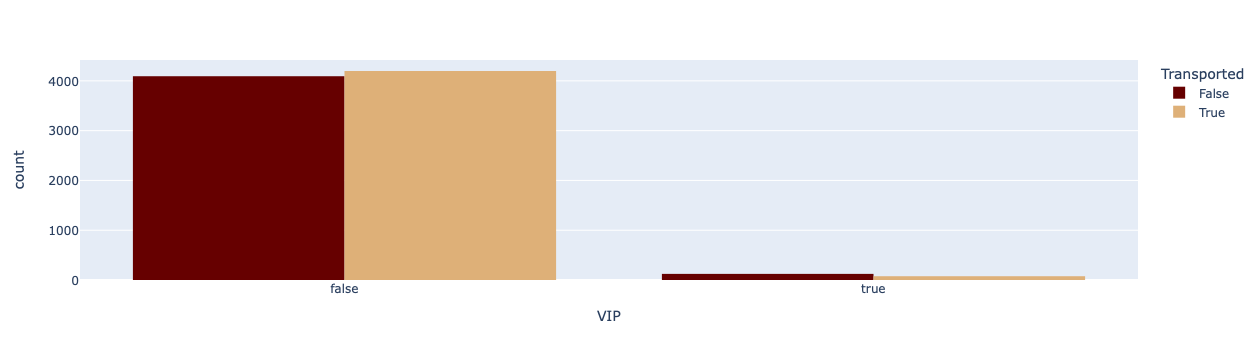

In [24]:
px.histogram(train, x='VIP', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [25]:
stats('VIP')

Overall_Percent       Category_Percent       
VIP                   False True             False  True 
Transported                                              
False                  48.2   1.4            49.37  61.81
True                   49.4   0.9            50.63  38.19

***
* 49.6 % (Not Transported) -> 48.2 %  were not vip
* 50.4 % (Transported)     -> 49.4 %  were not vip
***
* 50.63 % of non vip people got transported
* 38.19 % of vip people got transported
***

<b><span style='color:#660000'> Cabin_Side</span></b>

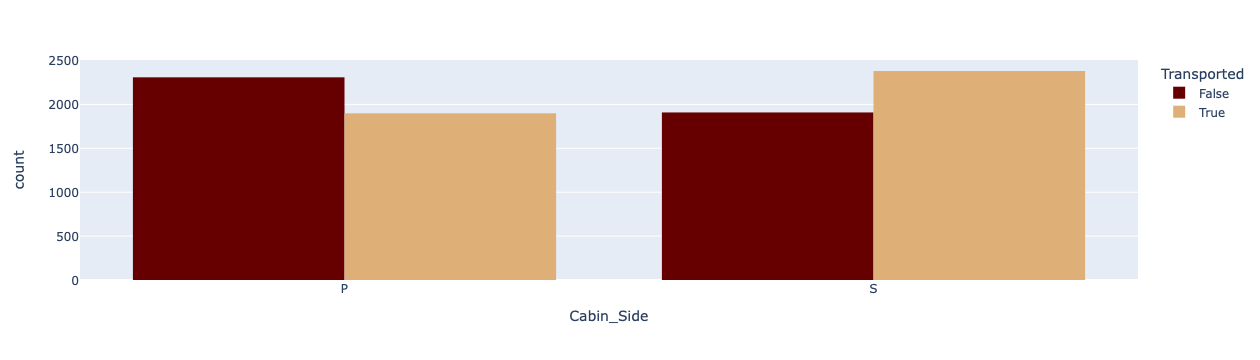

In [26]:
px.histogram(train, x='Cabin_Side', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [27]:
stats('Cabin_Side')

Overall_Percent       Category_Percent      
Cabin_Side                P     S                P     S
Transported                                             
False                  27.2  22.5            54.87  44.5
True                   22.3  28.0            45.13  55.5

***
* 49.6 % (Not Transported) -> 27.2 %  were on P side
* 50.4 % (Transported)     -> 28.0 %  were on S side
***
* 45.13 % of people on P side got transported
* 55.5 % of people on S side got transported
***

<b><span style='color:#660000'> Cabin_Deck</span></b>

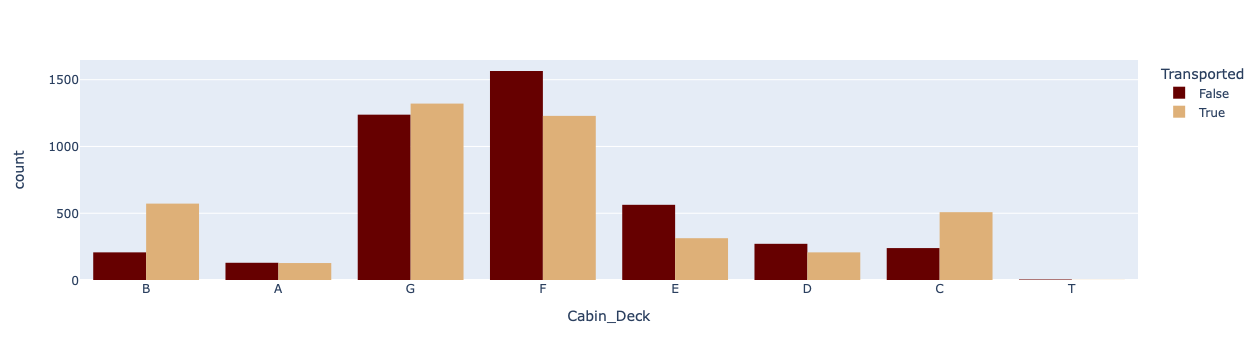

In [28]:
px.histogram(train, x='Cabin_Deck', color="Transported", barmode='group',color_discrete_sequence=['#660000','#DEB078'])

In [29]:
stats('Cabin_Deck')

Overall_Percent                                       \
Cabin_Deck                A    B    C    D    E     F     G    T   
Transported                                                        
False                   1.5  2.4  2.8  3.2  6.6  18.4  14.6  0.0   
True                    1.5  6.7  6.0  2.4  3.7  14.5  15.6  0.0   

            Category_Percent                                                  
Cabin_Deck                 A      B      C      D      E      F      G     T  
Transported                                                                   
False                  50.39  26.57  31.99  56.69  64.27  56.01  48.38  80.0  
True                   49.61  73.43  68.01  43.31  35.73  43.99  51.62  20.0

***
* 49.6 % (Not Transported) -> 18.4 %  were on F desck
* 50.4 % (Transported)     -> 15.6 %  were on G side
***
* 49.61 % of people on A Deck got transported
* 73.43 % of people on B Deck got transported
* 68.01 % of people on C Deck got transported
* 43.31 % of people on D Deck got transported
* 35.73 % of people on E Deck got transported
* 43.99 % of people on F Deck got transported
* 51.62 % of people on G Deck got transported
* 20.0 % of people on T Deck got transported
***

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#660000'> Target variable Relation with Numerical variables</span></b>  

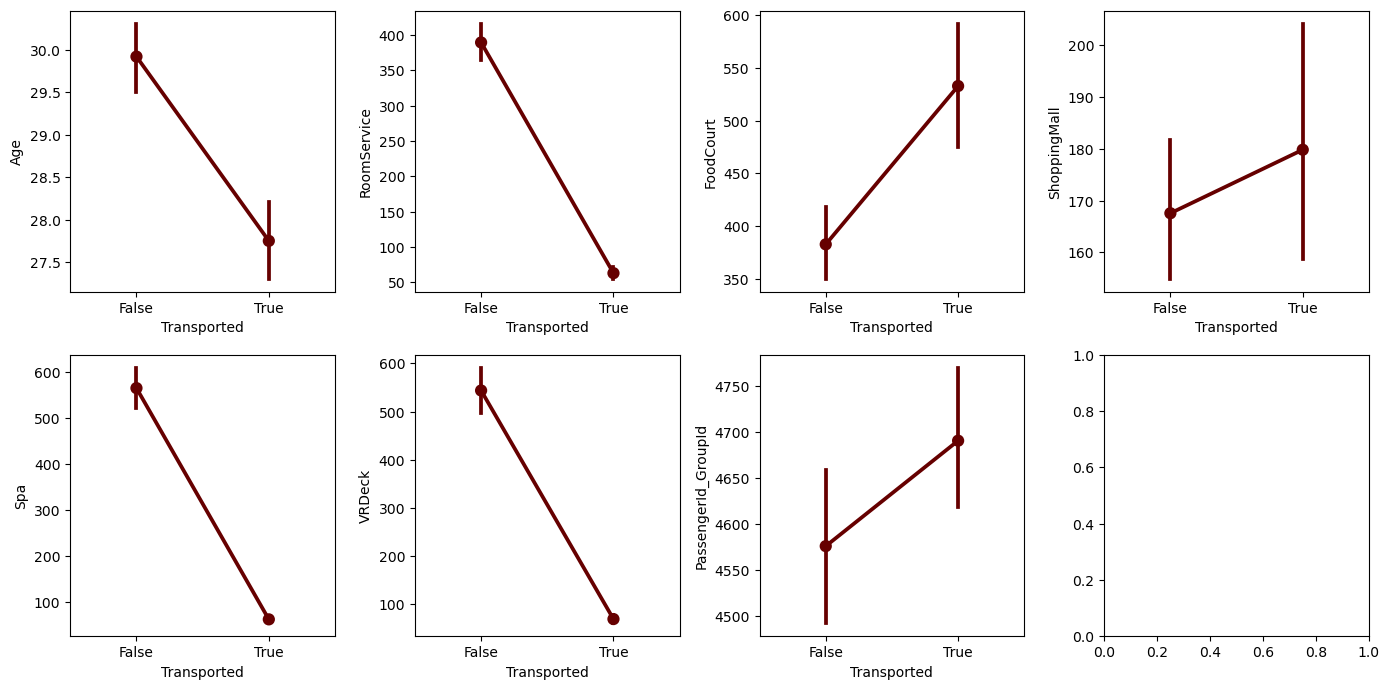

In [30]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
y=4
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,7))

for i in range(1,len(p)-1) :
    plt.subplot(x,y,i)
    sns.pointplot(data=train[p],y=p[i-1],x='Transported',color='#660000')
plt.tight_layout()    
plt.show()

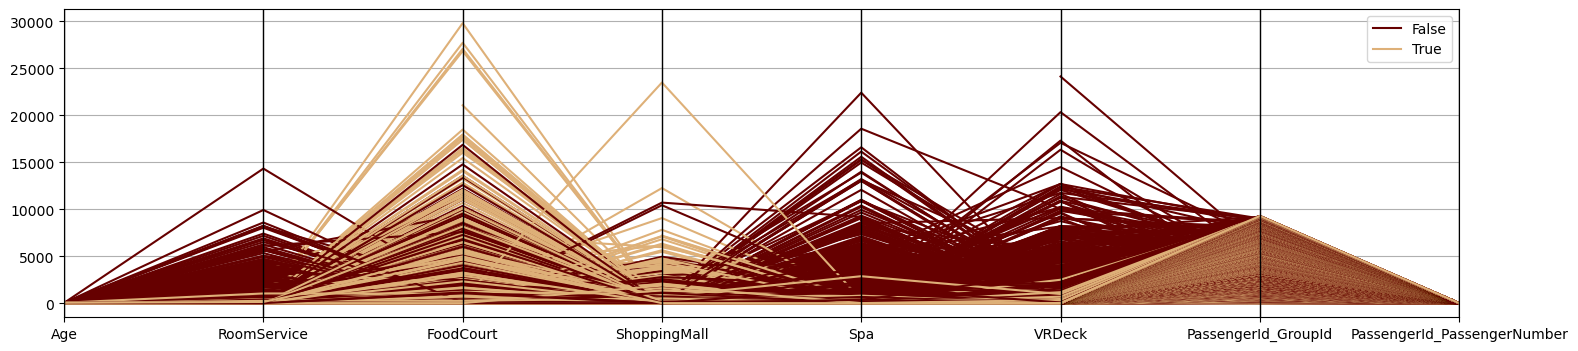

In [31]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
#p.remove("PassengerId_GroupId")
#p.remove('Age')
plt.figure(figsize=(18,4)) 
pd.plotting.parallel_coordinates(train[p], "Transported",color=('#660000','#DEB078'))
plt.show()

***
* Transported person tends to have less bill on spa, vrdeck & room service then the non transported person
* Transported person tends to have more bill on FoodCourt & Shopping Mall then the non transported person
***

### <b><span style='color:#DEB078'>4.4 |</span><span style='color:#660000'> Other Relationships leaving Target variable</span></b>  

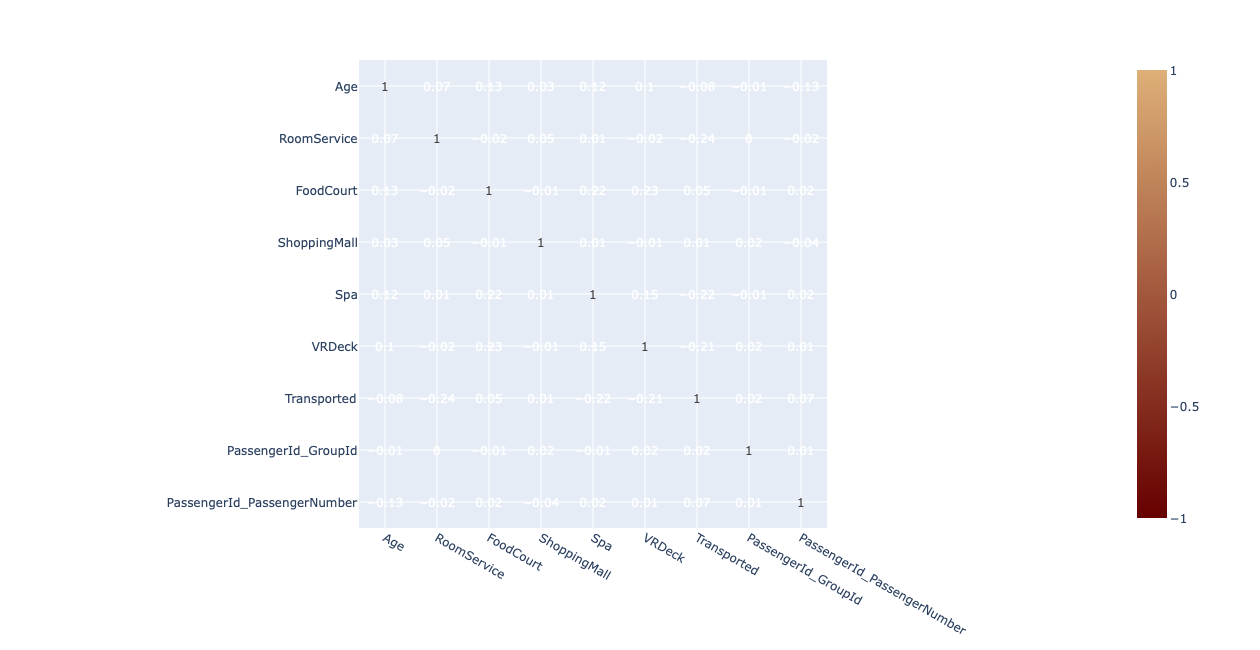

In [32]:
fig = px.imshow(train.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#660000','#DEB078'])
fig.show()

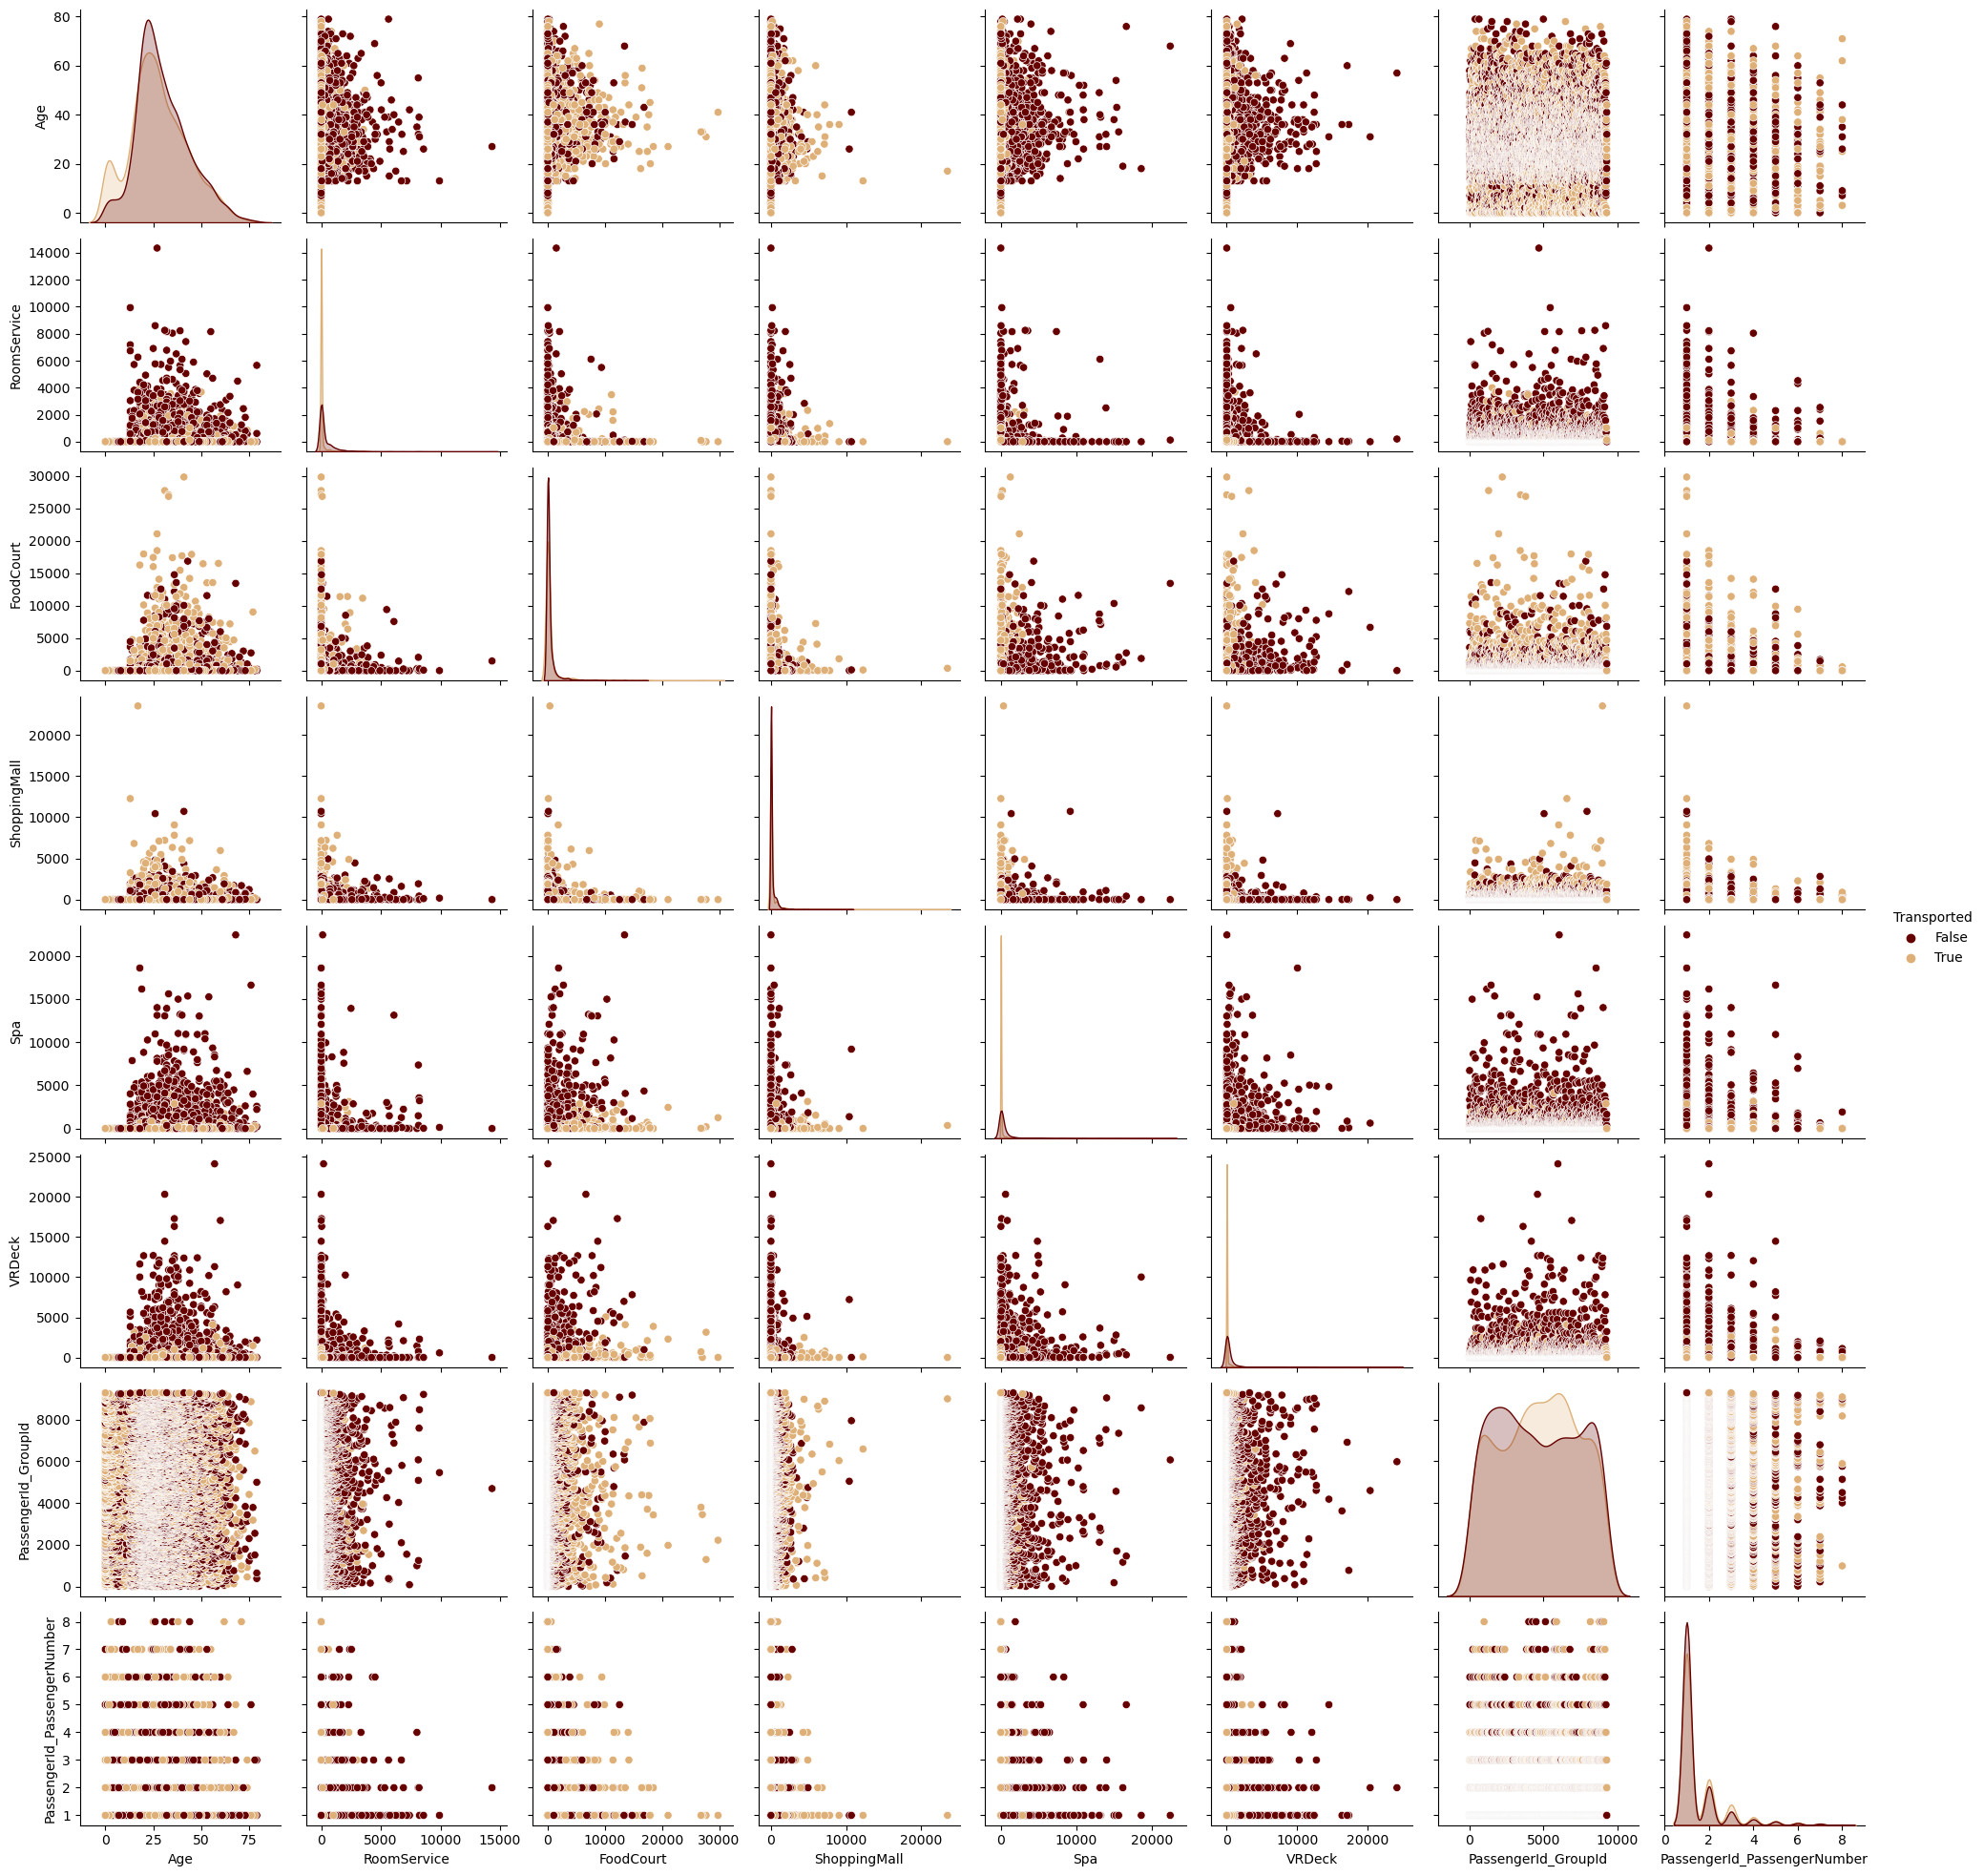

In [33]:
p=train.select_dtypes(include='number').columns.to_list()
p.append("Transported")
sns.pairplot(data=train[p],
                  hue='Transported'
             ,palette=['#660000','#DEB078']
)
                  
plt.show()

***
* No Strong Relationship Observerd among features 
* weak relationship observed among spa, vrdeck and food court
***

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>5 | Feature Engineering</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#660000'> Imputing Null Value </span></b>  

In [34]:
def ImputeNull(df):
    
    # Home planet 
    mode_HomePlanet = df['HomePlanet'].mode()[0]
    df['HomePlanet'].fillna(mode_HomePlanet,inplace=True)

    # CryoSleep
    mode_CryoSleep = df['CryoSleep'].mode()[0]
    df['CryoSleep'].fillna(mode_CryoSleep,inplace=True)

    # Destination
    mode_Destination = df['Destination'].mode()[0]
    df['Destination'].fillna(mode_Destination,inplace=True)

    # Age
    median_Age = df['Age'].median()
    df['Age'].fillna(median_Age,inplace=True)

    # VIP
    mode_VIP = df['VIP'].mode()
    df['VIP'].fillna(mode_VIP,inplace=True) 
    
    # RoomService
    median_RoomService = df['RoomService'].median()
    df['RoomService'].fillna(median_RoomService,inplace=True)
    
    # FoodCourt
    median_FoodCourt = df['FoodCourt'].median()
    df['FoodCourt'].fillna(median_FoodCourt,inplace=True)
    
    # ShoppingMall
    median_ShoppingMall = df['ShoppingMall'].median()
    df['ShoppingMall'].fillna(median_ShoppingMall,inplace=True)
    
    # Spa
    median_Spa = df['Spa'].median()
    df['Spa'].fillna(median_Spa,inplace=True)
    
    # VRDeck
    median_VRDeck = df['VRDeck'].median()
    df['VRDeck'].fillna(median_VRDeck,inplace=True)
    
    # Cabin_Deck
    mode_Cabin_Deck = df['Cabin_Deck'].mode()
    df['Cabin_Deck'].fillna(mode_Cabin_Deck,inplace=True) 
    
    # VIP
    mode_Cabin_Side = df['Cabin_Side'].mode()
    df['Cabin_Side'].fillna(mode_Cabin_Side,inplace=True) 
    
    return df
    

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#660000'> Label Encoding </span></b>  

In [35]:
def label_encoder(df):
    columns = ["HomePlanet", "CryoSleep","Cabin_Deck","Cabin_Side", "Destination" ,"VIP"]
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] =  LabelEncoder().fit_transform(df[col])
    return df


### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#660000'> Preprocessing Steps </span></b>  

In [36]:
def preProcess(df):
    
    df=df.assign(
            PassengerId_GroupId=df['PassengerId'].str[:4].astype(np.int16),
            PassengerId_PassengerNumber=df['PassengerId'].str[5:].astype(np.int16)
         )
    
    df=df.assign( 
           Cabin_Deck=df["Cabin"].str.split("/").str[0],
           Cabin_Num=df["Cabin"].str.split("/").str[1],
           Cabin_Side=df["Cabin"].str.split("/").str[2]
         )
    
    df=df.drop(columns=['PassengerId','Cabin','PassengerId_PassengerNumber','Cabin_Num','Name'])
    
    df=ImputeNull(df)
    
    df=label_encoder(df)
    
    return df

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>6 | Automated Model Using Lazypredict</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#660000'> Prepararation of Data For Model </span></b>  

In [62]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X)
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.40)



### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#660000'> Lazypredict Model Fitting </span></b>  

In [63]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , Y_train , Y_test)

100%|██████████| 29/29 [00:09<00:00,  2.92it/s]


### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#660000'> Models Evaluation </span></b>  

In [64]:
models[:15] # Top 15

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                        
LGBMClassifier                  0.81               0.81     0.81      0.81   
RandomForestClassifier          0.80               0.80     0.80      0.80   
SVC                             0.80               0.80     0.80      0.80   
XGBClassifier                   0.80               0.80     0.80      0.80   
NuSVC                           0.80               0.80     0.80      0.80   
AdaBoostClassifier              0.79               0.79     0.79      0.79   
LogisticRegression              0.79               0.79     0.79      0.79   
ExtraTreesClassifier            0.79               0.79     0.79      0.79   
LinearSVC                       0.79               0.79     0.79      0.79   
CalibratedClassifierCV          0.79               0.79     0.79      0.79   
SGDClassifier                   0.78               0.78     0.78      0.78   
BaggingClassifier               0.77               0.77     0.77      0.77   
KNeighborsClassifier            0.77               0.77     0.77      0.77   
LinearDiscriminantAnalysis      0.76               0.76     0.76      0.76   
RidgeClassifier                 0.76               0.76     0.76      0.76   

                            Time Taken  
Model                                   
LGBMClassifier                    0.15  
RandomForestClassifier            0.74  
SVC                               1.13  
XGBClassifier                     0.53  
NuSVC                             1.33  
AdaBoostClassifier                0.31  
LogisticRegression                0.03  
ExtraTreesClassifier              0.61  
LinearSVC                         0.45  
CalibratedClassifierCV            1.56  
SGDClassifier                     0.06  
BaggingClassifier                 0.21  
KNeighborsClassifier              0.27  
LinearDiscriminantAnalysis        0.05  
RidgeClassifier                   0.02

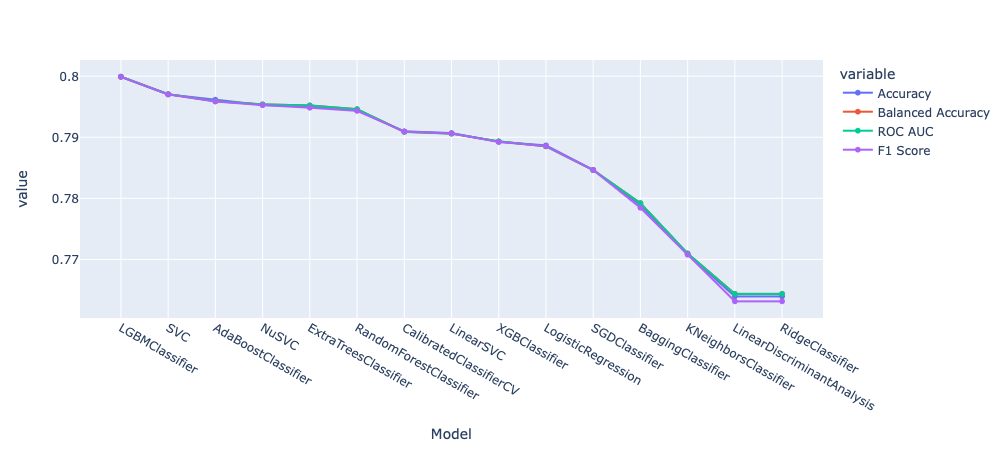

In [45]:
line = px.line(data_frame= models[:15] ,y =['Accuracy','Balanced Accuracy','ROC AUC','F1 Score'] , markers = True)
line.show()

### <b><span style='color:#DEB078'>6.4 |</span><span style='color:#660000'> Fitting one of the best Models from Lazypredict Result</span></b>  

In [65]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier( random_state=5)
lgbm.fit(X, Y)

LGBMClassifier(random_state=5)

### <b><span style='color:#DEB078'>6.4 |</span><span style='color:#660000'> Prediction Using LGBM</span></b>  

In [68]:
test1=preProcess(test)
y_pred = lgbm.predict(test1)

In [136]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Manual Linear Models With Parameter Tuning</div></b>

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression , RidgeClassifier , SGDClassifier 
from sklearn.svm import LinearSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X)

sc=StandardScaler()

X[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.fit_transform(X[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.40)

In [39]:
linear_models = {
                "LR"  : LogisticRegression(),
                "RC"  : RidgeClassifier(),
                "SGD" : SGDClassifier(),
                "LSVC": LinearSVC(),
                "LDA" : LinearDiscriminantAnalysis(),
                "SVC" : SVC()
                }
linear_models

{'LR': LogisticRegression(),
 'RC': RidgeClassifier(),
 'SGD': SGDClassifier(),
 'LSVC': LinearSVC(),
 'LDA': LinearDiscriminantAnalysis(),
 'SVC': SVC()}

In [42]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=5)
scoring_method = 'roc_auc'

*************************
LR: 0.870548 (0.015278)
*************************
RC: 0.850920 (0.015937)
*************************
SGD: 0.864455 (0.018110)
*************************
LSVC: 0.869991 (0.015232)
*************************
LDA: 0.850898 (0.015940)
*************************
SVC: 0.873381 (0.016114)
*************************


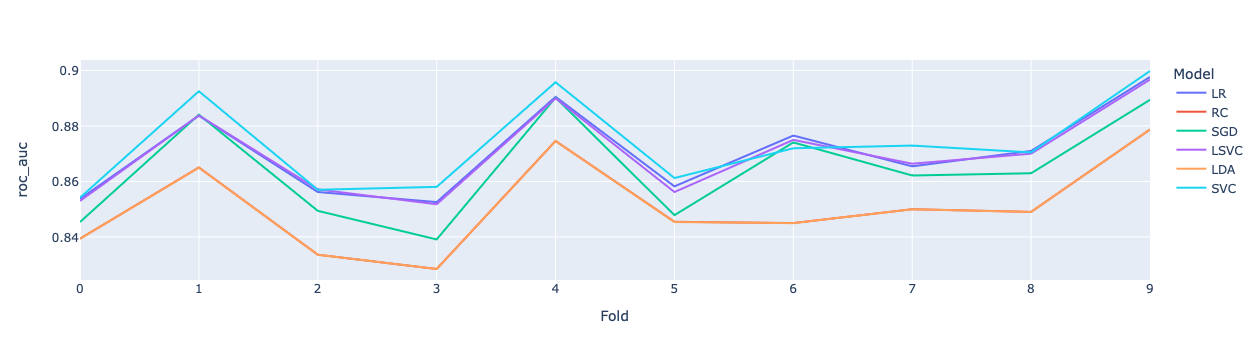

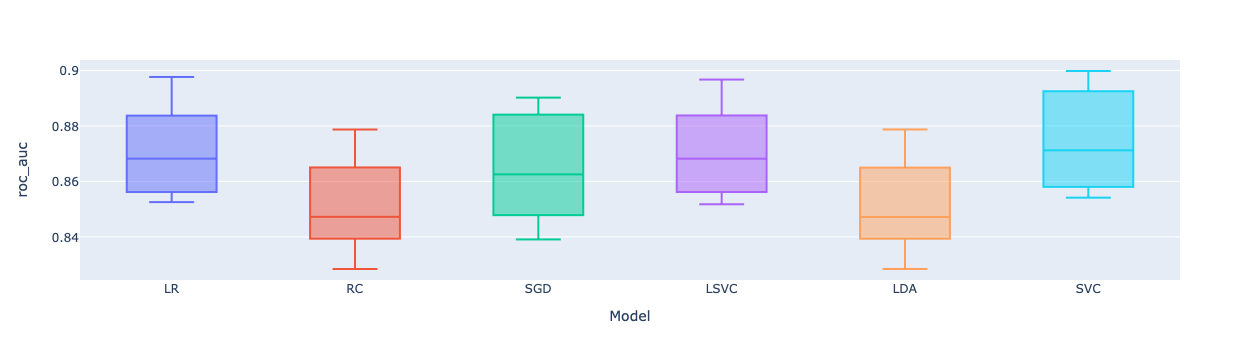

In [43]:
model_stats=pd.DataFrame()

print('*'*25)

for name, model in linear_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

In [44]:
linear_models = {
                "LR"  : LogisticRegression(),
                "RC"  : RidgeClassifier(),
                #"SGD" : SGDClassifier(),
                "LSVC": LinearSVC(),
                "LDA" : LinearDiscriminantAnalysis(),
                #"SVC" : SVC()
                }
linear_models

{'LR': LogisticRegression(),
 'RC': RidgeClassifier(),
 'LSVC': LinearSVC(),
 'LDA': LinearDiscriminantAnalysis()}

In [45]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.98, 1.00, 1.02],
    'tol': [1e-7, 1e-8, 1e-9],
    'max_iter': range(100, 250, 50)
}

parameter_grid=  {
                    'LR':{
                            'penalty': ['l1', 'l2'],
                                  'C': [0.98, 1.00, 1.02],
                                'tol': [1e-7, 1e-8, 1e-9],
                           'max_iter': range(100, 250, 50)             
                          } ,
    
                     'RC':{
                            'alpha': np.arange(0.00, 1.0, 0.05),
                            'tol': [1e-7, 1e-8, 1e-9],
                           'max_iter': range(100, 250, 50)             
                          } ,
    
                   'SGD' :{
                            'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
                            'n_iter': [1000], # number of epochs
                            #'loss': ['log'], # logistic regression,
                            'penalty': ['l2'],
                            #'n_jobs': [-1]
                        },
                    'LDA' : {
                        'solver': ['svd', 'lsqr'],
                        'n_components': [None] + [1, 2, 5, 8, 13, 21, 34, 55],
                        'store_covariance': [True, False],
                        'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                        },
                    'SVC' :{
                        'C': [0.1, 1, 10, 100, 1000], 
                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        #'kernel': ['rbf','linear','poly','sigmoid']
                       } ,
                    'LSVC' :{
                        'C': [0.1, 1, 10, 100, 1000]
                       } 
    
    
                  }


In [46]:
for name, model in linear_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='roc_auc' , cv=kf)
    model_gv.fit(X_train,Y_train)
    print('model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_)
    


************************* MODEL -> LR *************************

model_gv.best_score_  ->   0.8705508456967979
model_gv.best_estimator_ ->  LogisticRegression(C=0.98, tol=1e-07)
model_gv.best_params_ ->  {'C': 0.98, 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-07}
model_gv.best_index_ ->  3

************************* MODEL -> RC *************************

model_gv.best_score_  ->   0.8509182248005749
model_gv.best_estimator_ ->  RidgeClassifier(alpha=0.75, max_iter=100, tol=1e-07)
model_gv.best_params_ ->  {'alpha': 0.75, 'max_iter': 100, 'tol': 1e-07}
model_gv.best_index_ ->  135

************************* MODEL -> LSVC *************************

model_gv.best_score_  ->   0.8699736117473054
model_gv.best_estimator_ ->  LinearSVC(C=1)
model_gv.best_params_ ->  {'C': 1}
model_gv.best_index_ ->  1

************************* MODEL -> LDA *************************

model_gv.best_score_  ->   0.8508976272757266
model_gv.best_estimator_ ->  LinearDiscriminantAnalysis(store_covariance=True, 

In [50]:
linear_models = {
               # "LR"  : LogisticRegression(),
               # "RC"  : RidgeClassifier(),
                #"SGD" : SGDClassifier(),
               # "LSVC": LinearSVC(),
               # "LDA" : LinearDiscriminantAnalysis(),
                "SVC" : SVC()
                }
linear_models

{'SVC': SVC()}

In [ ]:
for name, model in linear_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    model_gv = RandomizedSearchCV( model ,parameter_grid[name],n_iter=15 , scoring='roc_auc' , cv=kf)
    model_gv.fit(X_train,Y_train)
    print('model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_)
    


************************* MODEL -> SVC *************************



In [47]:
lr = LogisticRegression(C=0.98, tol=1e-07)
lr.fit(X_train,Y_train) 

y_pred_lr = lr.predict(X_test)

print(metrics.roc_auc_score(y_pred_lr,Y_test))
print(metrics.accuracy_score(y_pred_lr,Y_test))

0.7944061649805159
0.7941345600920069


In [48]:
rc = RidgeClassifier(alpha=0.75, max_iter=100, tol=1e-07)
rc.fit(X_train,Y_train)

y_pred_rc = rc.predict(X_test)

print(metrics.roc_auc_score(y_pred_rc,Y_test))
print(metrics.accuracy_score(y_pred_rc,Y_test))

0.765692060804475
0.7619321449108684


In [49]:
lda = LinearDiscriminantAnalysis(store_covariance=True, tol=0.01)
lda.fit(X_train,Y_train)

y_pred_lda = lda.predict(X_test)

print(metrics.roc_auc_score(y_pred_lda,Y_test))
print(metrics.accuracy_score(y_pred_lda,Y_test))

0.7660202531730362
0.7622196664749856


In [219]:
gbc = GradientBoostingClassifier(max_depth=5, min_samples_leaf=5,min_samples_split=10, n_estimators=120)
gbc.fit(X_train,Y_train)

y_pred_gbc = gbc.predict(X_test)
print(metrics.roc_auc_score(y_pred_gbc,Y_test))
print(metrics.accuracy_score(y_pred_gbc,Y_test))

0.8228760201584635
0.8228867165037378


In [220]:

test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId_GroupId']]=sc.fit_transform(test[
                                                                                                    ['Age','RoomService','FoodCourt','ShoppingMall',
                                                                                                     'Spa','VRDeck','PassengerId_GroupId']])

test1=preProcess(test)
y_pred = gbc.predict(test1)

In [221]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Manual Tree Models Without Parameter Tuning</div></b>

### <b><span style='color:#DEB078'>7.1 |</span><span style='color:#660000'> Prepararation of Data For Model </span></b>  

In [147]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X)
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.20)

In [159]:
Y_train.value_counts(normalize=True).sort_index()

Transported
False          0.496405
True           0.503595
dtype: float64

In [160]:
Y_test.value_counts(normalize=True).sort_index()

Transported
False          0.496262
True           0.503738
dtype: float64

In [41]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [93]:
tree_models = {
                "DTC" : DecisionTreeClassifier(),
                "ETC" : ExtraTreeClassifier()    
                }
tree_models

{'DTC': DecisionTreeClassifier(), 'ETC': ExtraTreeClassifier()}

In [142]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=5)
scoring_method = 'roc_auc'

*************************
DTC: 0.736806 (0.014333)
*************************
ETC: 0.717299 (0.016713)
*************************


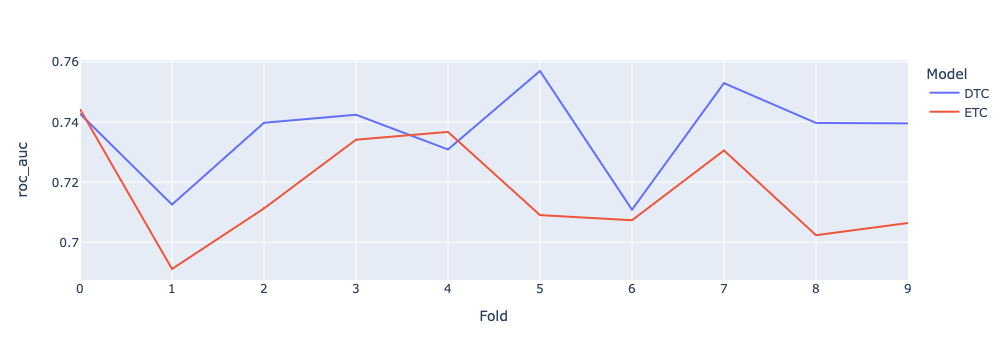

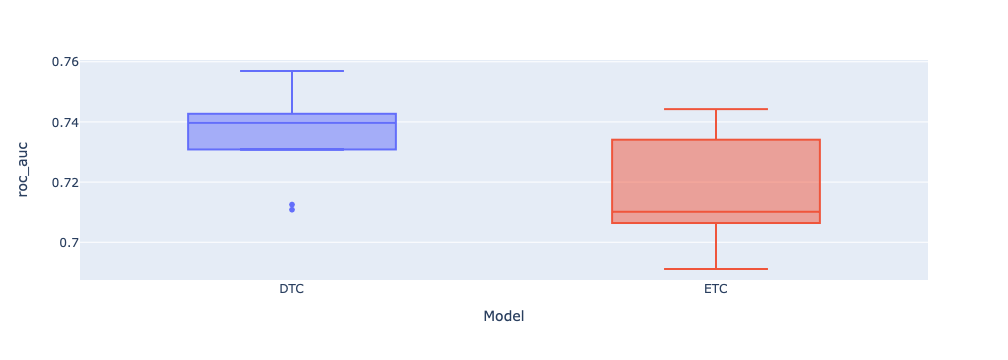

In [143]:
model_stats=pd.DataFrame()

print('*'*25)

for name, model in tree_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>8 | Manual Tree Models With Parameter Tuning</div></b>

In [131]:
parameter_grid=  {
                    'DTC':{
                            'criterion':['gini', 'entropy'],
                            'min_samples_leaf': [5, 10, 20, 50, 100],
                            'max_depth':[2,4,6,8,10,12,14,16,18]              
                          } ,
    
                     'ETC':{
                            'criterion':['gini', 'entropy'],
                            'min_samples_leaf': [5, 10, 20, 50, 100],
                            'max_depth':[2,4,6,8,10,12,14,16,18]              
                          } 
                  }


In [144]:
for name, model in tree_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='roc_auc' , cv=kf)
    model_gv.fit(X_train,Y_train)
    print('model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_)
    


************************* MODEL -> DTC *************************

model_gv.best_score_  ->   0.8615165510396137
model_gv.best_estimator_ ->  DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20)
model_gv.best_params_ ->  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20}
model_gv.best_index_ ->  62

************************* MODEL -> ETC *************************

model_gv.best_score_  ->   0.8266482315735143
model_gv.best_estimator_ ->  ExtraTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=5)
model_gv.best_params_ ->  {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5}
model_gv.best_index_ ->  80


In [166]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=20)
dtc.fit(X_train,Y_train)

y_pred = dtc.predict(X_test)
print(metrics.roc_auc_score(y_pred,Y_test))
print(metrics.accuracy_score(y_pred,Y_test))

0.7845609911560831
0.7832087406555491


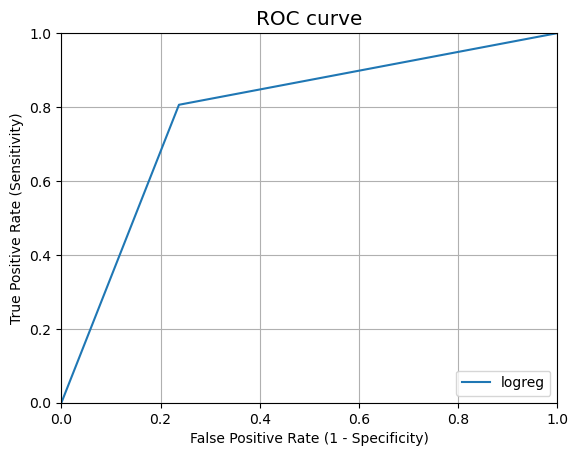

In [167]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds

fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_pred,Y_test)

plt.plot(fpr_logreg, tpr_logreg, label="logreg")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

In [155]:
print(metrics.classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

       False       0.82      0.76      0.79       924
        True       0.75      0.81      0.78       815

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [158]:
print(metrics.confusion_matrix(y_pred,Y_test))

[[705 219]
 [158 657]]


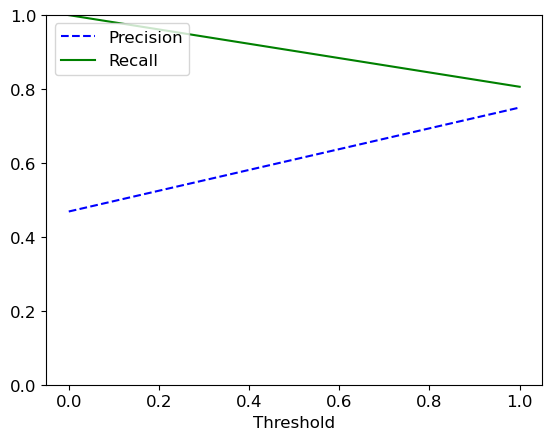

In [169]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_pred,Y_test)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Manual Ensemble Models Without Parameter Tuning</div></b>

In [177]:
X = df_raw.drop('Transported' , axis =1 )
Y = df_raw[['Transported']]

X=preProcess(X)
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.20)

In [178]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier                    

In [179]:
ensemble_models = {
                "RFC" : RandomForestClassifier(),
                "ABC" : AdaBoostClassifier()  ,
                "BC" : BaggingClassifier()  ,
                "GBC" : GradientBoostingClassifier()
                }
ensemble_models

{'RFC': RandomForestClassifier(),
 'ABC': AdaBoostClassifier(),
 'BC': BaggingClassifier(),
 'GBC': GradientBoostingClassifier()}

In [180]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=5)
scoring_method = 'roc_auc'

*************************
RFC: 0.875133 (0.011017)
*************************
ABC: 0.874942 (0.012571)
*************************
BC: 0.853160 (0.008081)
*************************
GBC: 0.886612 (0.010336)
*************************


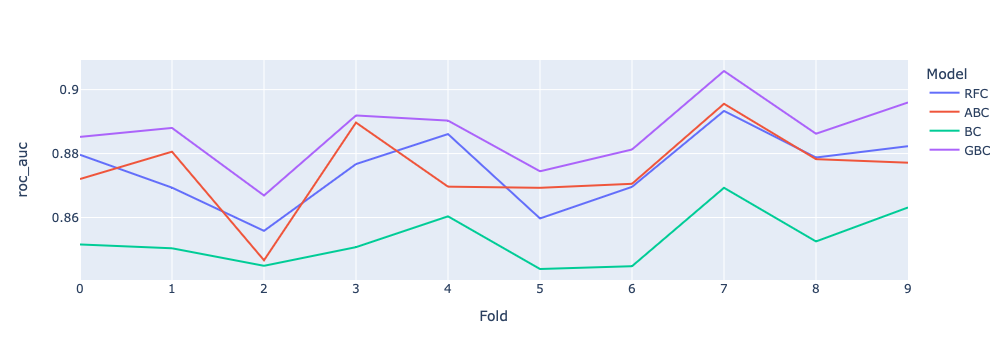

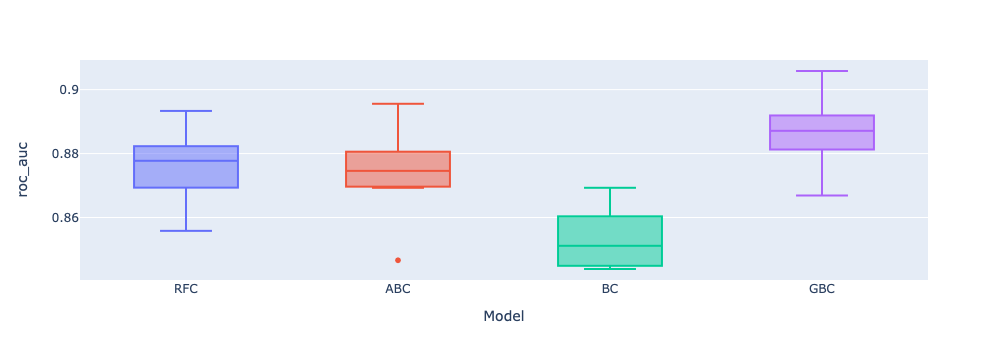

In [181]:
model_stats=pd.DataFrame()

print('*'*25)

for name, model in ensemble_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()  

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Manual Ensemble Models With Parameter Tuning</div></b>

In [186]:
parameter_grid=  {
                    'RFC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                            #'min_samples_leaf': [1,2,5,10],
                            #'max_depth':[5, 8, 15, 25, 30, None],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                            #'min_samples_leaf': [1,2,5,10],
                           # 'max_depth':[5, 8, 15, 25, 30, None],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
                    'BC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                           # 'min_samples_leaf': [1,2,5,10],
                           # 'max_depth':[5, 8, 15, 25, 30, None],
                           # 'min_samples_split':[1,2,5,10,15,100]
                          } ,
                    'GBC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                           # 'min_samples_leaf': [1,2,5,10],
                           # 'max_depth':[5, 8, 15, 25, 30, None],
                           # 'min_samples_split':[1,2,5,10,15,100]
                          } 
                  }


In [187]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    model_gv = GridSearchCV( model, parameter_grRandomizedSearchCV[name] , scoring='roc_auc' , cv=kf)
    model_gv.fit(X_train,Y_train)
    print('model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_)
    


************************* MODEL -> RFC *************************

model_gv.best_score_  ->   0.8778899071843362
model_gv.best_estimator_ ->  RandomForestClassifier(n_estimators=1200)
model_gv.best_params_ ->  {'n_estimators': 1200}
model_gv.best_index_ ->  4

************************* MODEL -> ABC *************************

model_gv.best_score_  ->   0.8744080418261536
model_gv.best_estimator_ ->  AdaBoostClassifier(n_estimators=120)
model_gv.best_params_ ->  {'n_estimators': 120}
model_gv.best_index_ ->  0

************************* MODEL -> BC *************************

model_gv.best_score_  ->   0.8756253948069311
model_gv.best_estimator_ ->  BaggingClassifier(n_estimators=800)
model_gv.best_params_ ->  {'n_estimators': 800}
model_gv.best_index_ ->  3

************************* MODEL -> GBC *************************

model_gv.best_score_  ->   0.8891955177277369
model_gv.best_estimator_ ->  GradientBoostingClassifier(n_estimators=300)
model_gv.best_params_ ->  {'n_estimators': 300}

In [192]:
rfc = RandomForestClassifier(n_estimators=1200)
rfc.fit(X_train,Y_train)

y_pred_rfc = rfc.predict(X_test)
print(metrics.roc_auc_score(y_pred_rfc,Y_test))
print(metrics.accuracy_score(y_pred_rfc,Y_test))

0.8084425920718217
0.8073605520414031


In [193]:
abc = AdaBoostClassifier(n_estimators=120)
abc.fit(X_train,Y_train)

y_pred_abc = abc.predict(X_test)
print(metrics.roc_auc_score(y_pred_abc,Y_test))
print(metrics.accuracy_score(y_pred_abc,Y_test))

0.8032488019169328
0.8016101207590569


In [195]:
bc = BaggingClassifier(n_estimators=800)
bc.fit(X_train,Y_train)

y_pred_bc = bc.predict(X_test)
print(metrics.roc_auc_score(y_pred_bc,Y_test))
print(metrics.accuracy_score(y_pred_bc,Y_test))

0.7977004903249099
0.7964347326049454


In [196]:
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(X_train,Y_train)

y_pred_gbc = gbc.predict(X_test)
print(metrics.roc_auc_score(y_pred_gbc,Y_test))
print(metrics.accuracy_score(y_pred_gbc,Y_test))

0.8223670281743071
0.8223116733755031


In [197]:
test1=preProcess(test)
y_pred = gbc.predict(test1)

In [198]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

In [207]:
# AdaBoostClassifier().get_params().keys()    -> to get parameters for tuning

parameter_grid=  {
                    'RFC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                            'min_samples_leaf': [1,2,5,10],
                            'max_depth':[5, 8, 15, 25, 30, None],
                            'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
                    'BC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                            'max_samples': [x / 10 for x in range(1, 11)]

                          } ,
                    'GBC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                            'min_samples_leaf': [1,2,5,10],
                            'max_depth':[5, 8, 15, 25, 30, None],
                            'min_samples_split':[1,2,5,10,15,100]
                          } 
                  }


In [ ]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    model_rv = RandomizedSearchCV( model, parameter_grid[name] , scoring='roc_auc' , cv=kf)
    model_rv.fit(X_train,Y_train)
    print('model_gv.best_score_  ->  ',model_rv.best_score_)
    print('model_gv.best_estimator_ -> ',model_rv.best_estimator_)
    print('model_gv.best_params_ -> ',model_rv.best_params_)
    print('model_gv.best_index_ -> ',model_rv.best_index_)
    


************************* MODEL -> RFC *************************

model_gv.best_score_  ->   0.885825755914522
model_gv.best_estimator_ ->  RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500)
model_gv.best_params_ ->  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None}
model_gv.best_index_ ->  3

************************* MODEL -> ABC *************************

model_gv.best_score_  ->   0.8750304712070482
model_gv.best_estimator_ ->  AdaBoostClassifier(learning_rate=0.99, n_estimators=120)
model_gv.best_params_ ->  {'n_estimators': 120, 'learning_rate': 0.99}
model_gv.best_index_ ->  2

************************* MODEL -> BC *************************

model_gv.best_score_  ->   0.8824518313705632
model_gv.best_estimator_ ->  BaggingClassifier(max_samples=0.3, n_estimators=1200)
model_gv.best_params_ ->  {'n_estimators': 1200, 'max_samples': 0.3}
model_gv.best_index_ ->  2

**********************

In [210]:
rfc = RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,n_estimators=500)
rfc.fit(X_train,Y_train)

y_pred_rfc = rfc.predict(X_test)
print(metrics.roc_auc_score(y_pred_rfc,Y_test))
print(metrics.accuracy_score(y_pred_rfc,Y_test))

0.8102431391429947
0.8102357676825762


In [211]:
abc = AdaBoostClassifier(learning_rate=0.99, n_estimators=120)
abc.fit(X_train,Y_train)

y_pred_abc = abc.predict(X_test)
print(metrics.roc_auc_score(y_pred_abc,Y_test))
print(metrics.accuracy_score(y_pred_abc,Y_test))

0.8077751192988712
0.8062104657849338


In [212]:
bc = BaggingClassifier(max_samples=0.3, n_estimators=1200)
bc.fit(X_train,Y_train)

y_pred_bc = bc.predict(X_test)
print(metrics.roc_auc_score(y_pred_bc,Y_test))
print(metrics.accuracy_score(y_pred_bc,Y_test))

0.8063917285691982
0.8062104657849338


In [219]:
gbc = GradientBoostingClassifier(max_depth=5, min_samples_leaf=5,min_samples_split=10, n_estimators=120)
gbc.fit(X_train,Y_train)

y_pred_gbc = gbc.predict(X_test)
print(metrics.roc_auc_score(y_pred_gbc,Y_test))
print(metrics.accuracy_score(y_pred_gbc,Y_test))

0.8228760201584635
0.8228867165037378


In [220]:
test1=preProcess(test)
y_pred = gbc.predict(test1)

In [221]:
submission['Transported'] = y_pred.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False